# Inference with pre-trained CNN model
This notebook demonstrates a standardized pipeline for utilizing pre-trained models and their associated weights from the Torch Hub. The pipeline allows for the selection of a specific model and its weights, followed by inference on a provided image.

## Resources
- [Torch Vision Model](https://pytorch.org/vision/stable/models.html) : List of available models and weights, pretrain and
- [Torch Hub Website](https://pytorch.org/hub/) : List of models available + basic usage (weights/pretransform) examples.
- [Torch Official Tutorial](https://pytorch.org/hub/pytorch_vision_resnet/) : Tutorial on basic pytorch.


In [ ]:
!pip install torchinfo

In [1]:
import torch
from torchvision import transforms

In [2]:
## Helpful comments to explore torch (aside from browsing on their websites)
## to Explore torch hub list of models(where the pre-trained models are hosted)
torch.hub.list('pytorch/vision')

## to get help on pytorch/vision in torch hub
# print(torch.hub.help('pytorch/vision','get_weight'))

Downloading: "https://github.com/pytorch/vision/zipball/main" to C:\Users\alien/.cache\torch\hub\main.zip


['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fcn_resnet101',
 'fcn_resnet50',
 'get_model_weights',
 'get_weight',
 'googlenet',
 'inception_v3',
 'lraspp_mobilenet_v3_large',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'r2plus1d_18',
 'r3d_18',
 'raft_large',
 'raft_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1

# Summary
## One Cell scripts for pretrain model and inference
Individuals who possess the ability to comprehend and follow the scripts presented in the subsequent cell may forgo the explanatory sections, as these sections provide a more detailed analysis of the aforementioned cells.

In [3]:
import torch
import urllib
from PIL import Image
from torchvision import transforms

# Load a specify pretrain model on ImageNet
model = torch.hub.load('pytorch/vision', 'resnet18', weights="IMAGENET1K_V1")
model.eval()
# Loading the pretrain weight
weight = torch.hub.load('pytorch/vision', 'get_weight', name="ResNet18_Weights.IMAGENET1K_V1")


# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

## Load the image into a PIL image
# before using the pre-trained image, one must preprocess the image (resize with right resolution, inference transform, rescale the values).
# This can vary across model families, variants or even weights versions.
input_image = Image.open(filename)
preprocess = weight.transforms()
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# Move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0].shape)
probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Read the categories
categories = weight.value.meta['categories']
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Using cache found in C:\Users\alien/.cache\torch\hub\pytorch_vision_main
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\alien/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 113MB/s] 
Using cache found in C:\Users\alien/.cache\torch\hub\pytorch_vision_main


torch.Size([1000])
Samoyed 0.8848242163658142
Arctic fox 0.045712053775787354
white wolf 0.044191744178533554
Pomeranian 0.005616898648440838
Great Pyrenees 0.004656661301851273


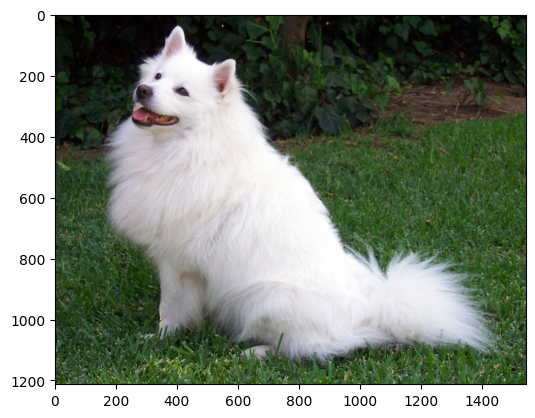

In [4]:
from matplotlib import pyplot as plt
plt.imshow(input_image)

# Breakdown

## Model Loading
The model is loaded using `torch.hub.load()` function, the first argument is the repository name, the second argument is the model name, and the third argument is the model version.

### Torch Hub - Models

- **Pre-trained Weights**: The script utilizes the `torch.hub.load()` function to acquire the pre-trained "resnet18" model, leveraging its weights trained on the ImageNet dataset.
- **Evaluation Mode**: The `model.eval()` method is employed to transition the loaded model into evaluation mode.
    - This mode deactivates functionalities like `Dropout` and `BatchNorm` layers, which are not necessary for the inference task and can even hinder performance. `Dropout` layers, for instance, randomly sets its inputs to 0 during training time, which helps prevent overfitting. However, doing this at evaluation time would definitely hinder performance.

- The alternative is `model.train()`

In [5]:
import torch
from torchinfo import summary
model = torch.hub.load('pytorch/vision', 'resnet18', weights="IMAGENET1K_V1")
model.eval()
summary(model)

Using cache found in C:\Users\alien/.cache\torch\hub\pytorch_vision_main


Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─BasicBlock: 2-1                   --
│    │    └─Conv2d: 3-1                  36,864
│    │    └─BatchNorm2d: 3-2             128
│    │    └─ReLU: 3-3                    --
│    │    └─Conv2d: 3-4                  36,864
│    │    └─BatchNorm2d: 3-5             128
│    └─BasicBlock: 2-2                   --
│    │    └─Conv2d: 3-6                  36,864
│    │    └─BatchNorm2d: 3-7             128
│    │    └─ReLU: 3-8                    --
│    │    └─Conv2d: 3-9                  36,864
│    │    └─BatchNorm2d: 3-10            128
├─Sequential: 1-6                        --
│    └─BasicBlock: 2-3                   --
│    │    └─Conv2d: 3-11                 73,728

## Download an example image
 from the pytorch website

In [ ]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

## Loading the Image and pretransforming
We will use torch hub's weights and PIL to load the image and pre-transform it before feeding it to the model.

Before using the pre-trained image, one must preprocess the image (resize with right resolution, inference transform, rescale the values). This can vary across model families, variants or even weights versions.

In [ ]:
# weight.transforms bundles the necessary preprocessing transform for the model
preprocess = weight.transforms()
preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
# In this case, both the manual preprocess and the weight.transforms are equivalent
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), #imagenet standard
])
preprocess

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [ ]:
# Load the image into a PIL image
## make sure it is of certain size and normalized
# input_image = Image.open(filename)
preprocess = weight.transforms()
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# Move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0].shape)
probabilities = torch.nn.functional.softmax(output[0], dim=0)

torch.Size([1000])


# Inference Execution
Scripts for inference
- **Gradient Calculation Deactivation**: The *torch.no_grad()* context manager is employed within the inference process to disable gradient computation. This optimization reduces memory consumption during inference, as gradients are not required for updating model weights.

- **Probability Acquisition**: A Softmax function is applied at the conclusion of the inference pipeline. This function transforms the model's output logits into probability scores, representing the likelihood of each potential class assignment for the input data.

In [ ]:
with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0].shape)
probabilities = torch.nn.functional.softmax(output[0], dim=0)
# Transforming the output to probabilities

torch.Size([1000])


## Acquiring the Top Predictions labels

The script leverages torch hub weights to acquire the categories of the predictions.

1.. **Top class acquiring**: Torch included scripts to aid in showing the top categories via *torch.topk*, along with top class.


In [ ]:
# Download ImageNet labels
categories = weight.value.meta['categories']
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.8846217393875122
Arctic fox 0.04580526798963547
white wolf 0.04427628964185715
Pomeranian 0.005621335469186306
Great Pyrenees 0.004652000498026609
